# NBA Statistics

Data taken from GitHub user reubenfb from https://github.com/fivethirtyeight/data/tree/master/nba-elo

## Goal:
My goal in this was to use the statistics that is on the csv file to discover various trends in basketball. This csv file contains things such as game locaiton, teams playing, points scored, and forecast.

In [3]:
%matplotlib inline
from ggplot import *
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
nba = pd.DataFrame.from_csv('nbaallelo.csv', index_col = None)
nba.head()

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
0          1  194611010TRH   NBA        0     1947  11/1/1946           1   
1          1  194611010TRH   NBA        1     1947  11/1/1946           1   
2          2  194611020CHS   NBA        0     1947  11/2/1946           1   
3          2  194611020CHS   NBA        1     1947  11/2/1946           2   
4          3  194611020DTF   NBA        0     1947  11/2/1946           1   

   is_playoffs team_id  fran_id  ...   win_equiv  opp_id  opp_fran  opp_pts  \
0            0     TRH  Huskies  ...   40.294830     NYK    Knicks       68   
1            0     NYK   Knicks  ...   41.705170     TRH   Huskies       66   
2            0     CHS    Stags  ...   42.012257     NYK    Knicks       47   
3            0     NYK   Knicks  ...   40.692783     CHS     Stags       63   
4            0     DTF  Falcons  ...   38.864048     WSC  Capitols       50   

   opp_elo_i  opp_elo_n  game_location  game_result  forecast notes  
0  1300.0000  1306.7233              H            L  0.640065   NaN  
1  1300.0000  1293.2767              A            W  0.359935   NaN  
2  1306.7233  1297.0712              H            W  0.631101   NaN  
3  1300.0000  1309.6521              A            L  0.368899   NaN  
4  1300.0000  1320.3811              H            L  0.640065   NaN  

[5 rows x 23 columns]

## Header Information
gameorder - Play order of game in NBA history

game_id - Unique id for each game

lg_id - Which league the game was played in

_iscopy - Returns whether or not the game_id is repeated

year_id - Year of season

date_game - Game date

seasongame - What game in the season is played for that team

is_playoffs - Returns whether or not it is a playoff game

team_id - Unique 3 letter identifier for team

fran_id - Team's franchise name

pts - Points scored by team

elo_i - Team elo rating before game

elo_n - Team elo rating after game

win_equiv - Equivalent number of wins in an 82-game season for a team with elo_n rating

opp_id - Unique 3 letter identifier for opposing team

opp_fran - Opposing franchise name

opp_pts - Oposing team's score

opp_elo_i - Opposing team's elo rating before game

opp_elo_n - Opposing team's elo rating after game

game_location - Home (H), Away (A), or neutral (N)

game_result - Win or loss team_id

forcast - Chances of winning for team_id based on elo and locations

notes - Any additional info

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

# Questions 
How have basketball scores changed over the years?

Does home or away actually impact scores?

What teams have the most upsets?

Is there a particular time period when teams play best?

How long do successful teams stay successful?

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
##  How have basketball scores changed over the years?

In [24]:
soy = nba
soy['total_score'] = nba.pts + nba.opp_pts #Creates a total score
soy = soy[soy._iscopy == 0] #Gets rid of repeats
soy = soy[["year_id", "total_score", "pts", "opp_pts"]] #Keeps only relevant info
soy = soy.groupby(["year_id"]).mean() #Average scores in each year
soy = soy.reset_index() #Returns year_id as an index and not just a column
soy.head()

year_id  total_score        pts    opp_pts
0     1947   135.831429  69.160000  66.671429
1     1948   145.209302  73.562791  71.646512
2     1949   159.860526  81.555263  78.305263
3     1950   160.128162  82.608769  77.519393
4     1951   167.992105  87.305263  80.686842

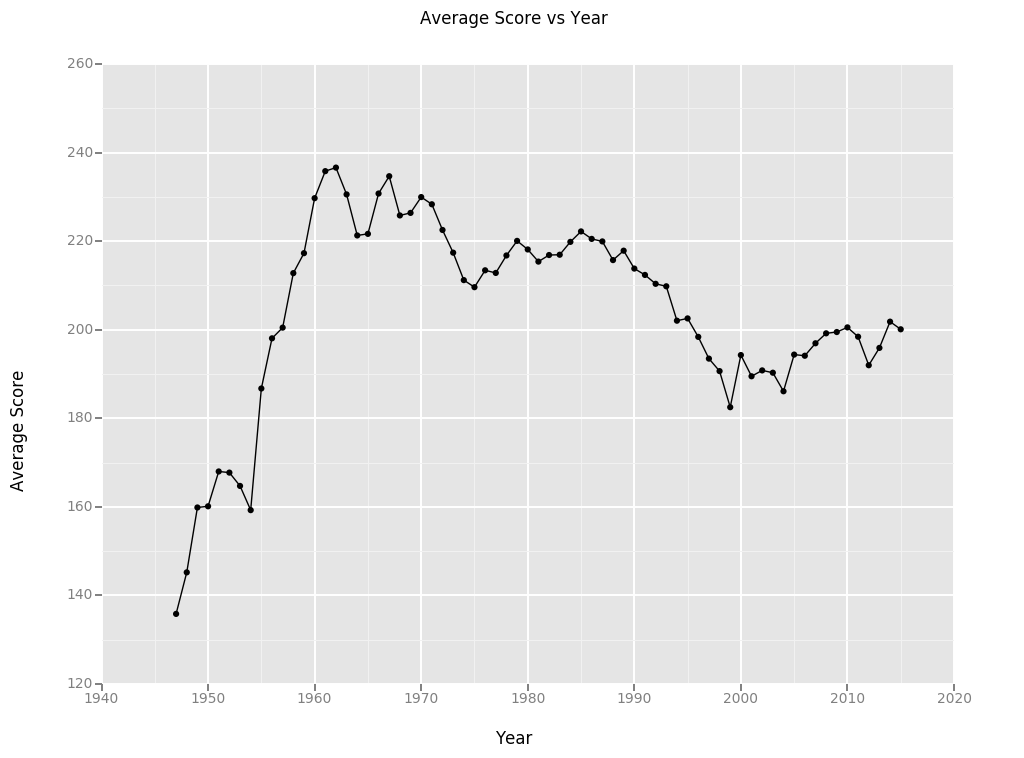

<ggplot: (8750777712753)>

In [166]:
soy_graph = ggplot(aes(x='year_id',y='total_score'),data = soy) #Put info together
soy_graph + geom_line() + geom_point() + xlab("Year") + ylab("Average Score") +  ggtitle("Average Score vs Year")

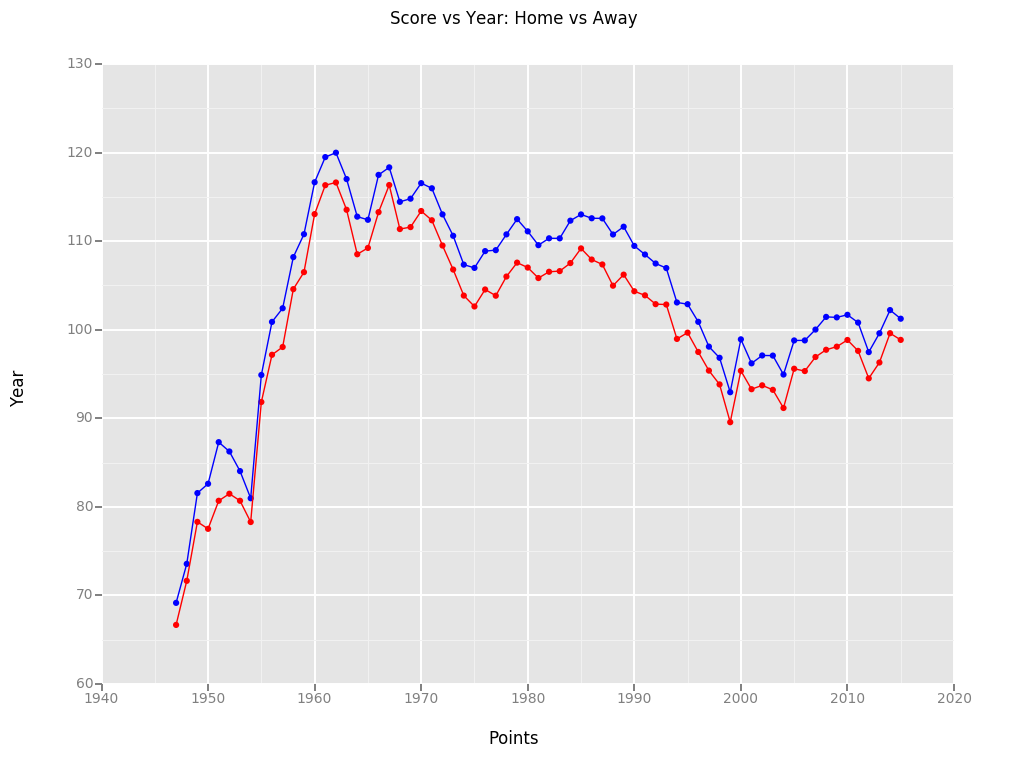

<ggplot: (-9223363286078703521)>

In [208]:
soy_graph = ggplot(aes(x='year_id',y='pts'),data = soy)
soy_graph + geom_line(color='blue') + geom_point(color='blue') +  \
            geom_line(aes(y='opp_pts'),color='red') + geom_point(aes(y='opp_pts'),color='red') + \
            xlab("Points") + ylab("Year") + ggtitle("Score vs Year: Home vs Away")# + \
            #legend(2000,120, c("Home","Away"))


---
# Does a games location (Home, Away, Neutral) impact score?

In [8]:
loc = nba
loc = loc[loc.game_location=='H'] #Gets only home games
loc = loc[["year_id", "game_result"]] #Cleaning
loc.head()

year_id game_result
0     1947           L
2     1947           W
4     1947           L
7     1947           W
9     1947           W

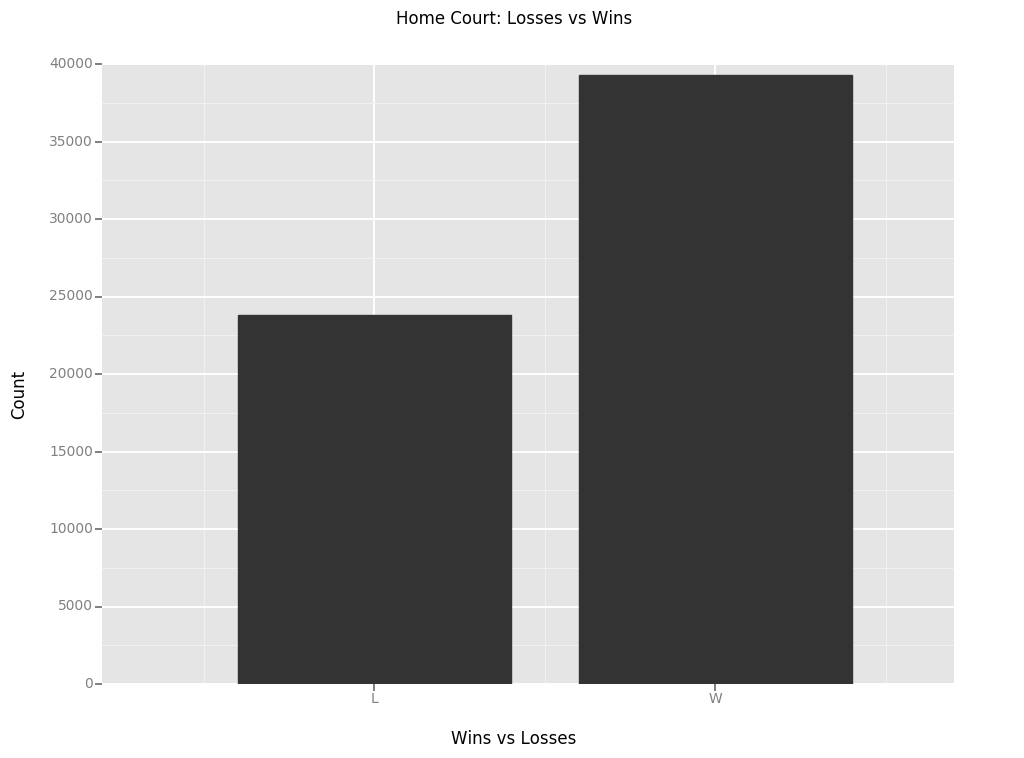

<ggplot: (8750837589105)>

In [9]:
loc_graph = ggplot(aes(x='game_result'),data = loc) #Put info together
loc_graph + geom_bar() + ylab("Count") + xlab("Wins vs Losses") + \
            ggtitle("Home Court: Losses vs Wins")

#### I thought that the difference above was too huge, so I wanted to see if there was a particular decade that skewed these results

In [10]:
loc_dec = nba
loc_dec['decade'] = loc_dec.year_id //10 * 10 #Allows us to group by decade
loc_dec = loc_dec[loc_dec.game_location=='H'] #Gets only home games
loc_dec = loc_dec[["decade", "game_result"]] #Cleaning

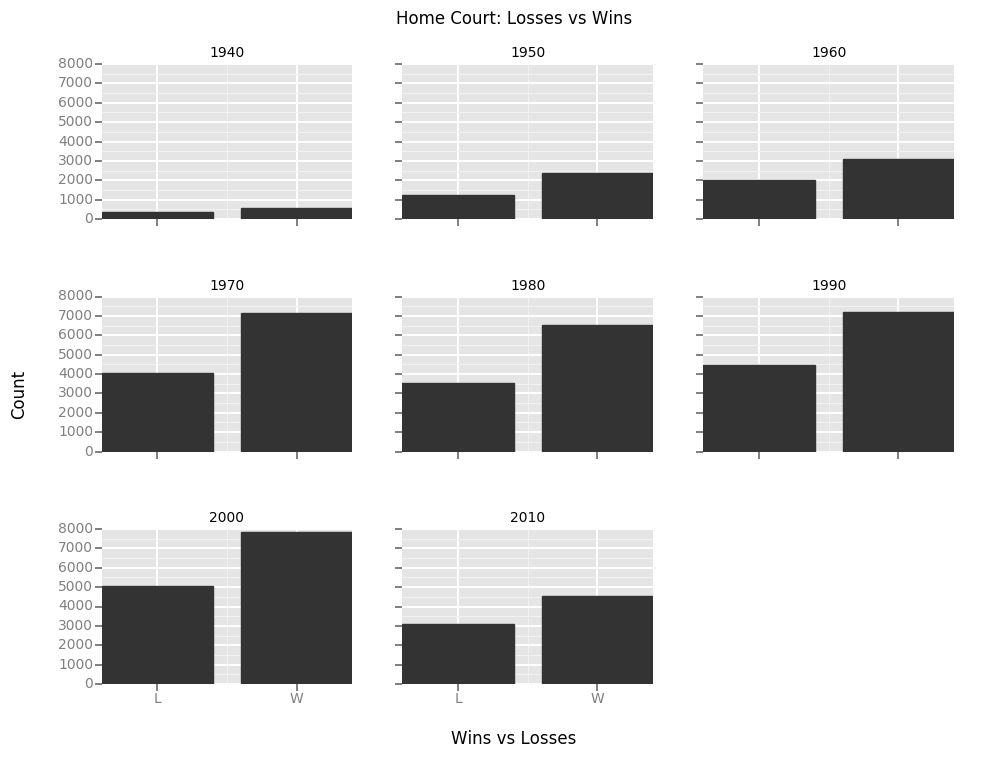

<ggplot: (8750783382294)>

In [111]:
loc_dec_graph = ggplot(aes(x='game_result'),data = loc_dec) #Put info together
loc_dec_graph + geom_bar() + ylab("Count") + xlab("Wins vs Losses") + \
            ggtitle("Home Court: Losses vs Wins") + facet_wrap("decade")

---
# What teams have the most upsets?

In [210]:
upsets = nba
upsets = upsets[upsets.forecast < 0.5]
upsets = upsets.groupby("team_id").size()
upsets = upsets.to_frame().reset_index().sort_values(0, ascending = False).head(15)
upsets = upsets.rename(columns = {0:"num_upsets"})
upsets

team_id  num_upsets
63     NYK        2948
22     DET        2606
18     CLE        2175
5      BOS        2157
68     PHI        2156
30     GSW        2118
2      ATL        2065
12     CHI        2052
56     NJN        1876
45     MIL        1870
40     LAC        1737
21     DEN        1734
72     POR        1722
31     HOU        1719
69     PHO        1713

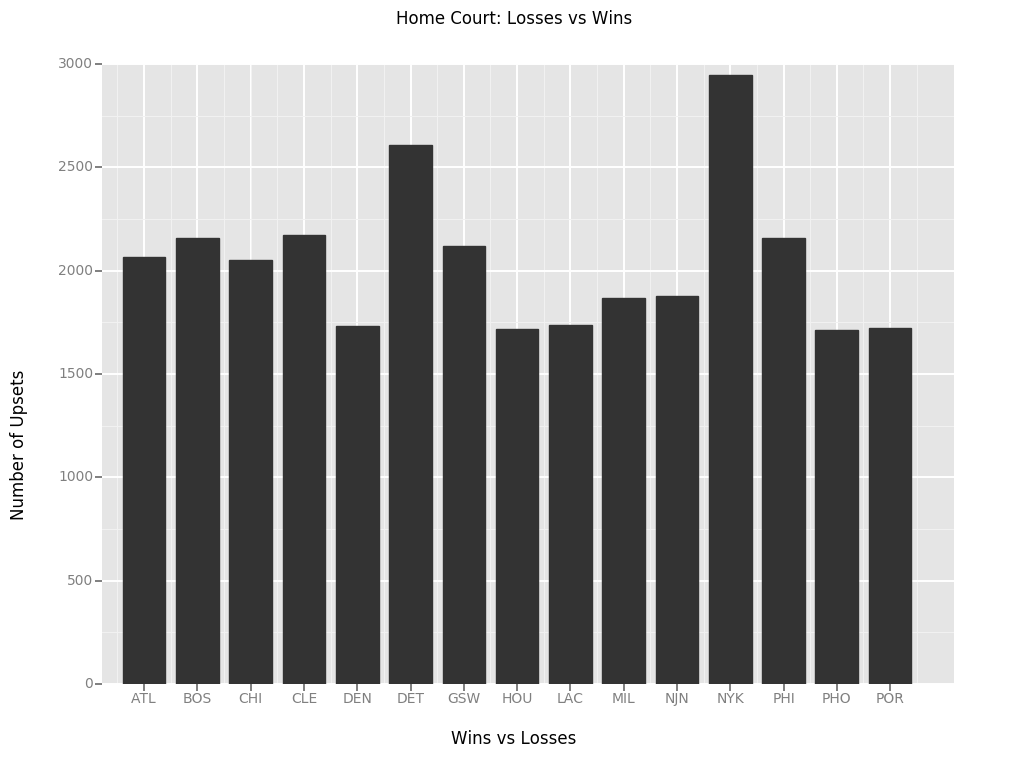

<ggplot: (-9223363286079282281)>

In [223]:
upsets_graph = ggplot(aes("team_id",  weight = "num_upsets"),data = upsets) #Put info together
upsets_graph + geom_bar() + ylab("Number of Upsets") + xlab("Wins vs Losses") + \
               ggtitle("Home Court: Losses vs Wins")

---
# How long do successful teams stay successful?

In [179]:
ts = nba[(nba.team_id == "CHI") | (nba.team_id == "GSW") | (nba.team_id == "LAL") |
         (nba.team_id == "PHI") | (nba.team_id == "BOS") | (nba.team_id == "DET")]  #Get a few historically successful teams
ts = ts[ts.game_result == 'W']  #Count amount of wins in each season
ts = ts.groupby(["team_id", "year_id"]).count().reset_index() #Group by the team id and year id to get our result
ts.head()

team_id  year_id  gameorder  game_id  lg_id  _iscopy  date_game  seasongame  \
0     BOS     1947         22       22     22       22         22          22   
1     BOS     1948         21       21     21       21         21          21   
2     BOS     1949         25       25     25       25         25          25   
3     BOS     1950         22       22     22       22         22          22   
4     BOS     1951         39       39     39       39         39          39   

   is_playoffs  fran_id   ...    opp_fran  opp_pts  opp_elo_i  opp_elo_n  \
0           22       22   ...          22       22         22         22   
1           21       21   ...          21       21         21         21   
2           25       25   ...          25       25         25         25   
3           22       22   ...          22       22         22         22   
4           39       39   ...          39       39         39         39   

   game_location  game_result  forecast  notes  total_score  decade  
0             22           22        22      0           22      22  
1             21           21        21      0           21      21  
2             25           25        25      1           25      25  
3             22           22        22      5           22      22  
4             39           39        39      4           39      39  

[5 rows x 25 columns]

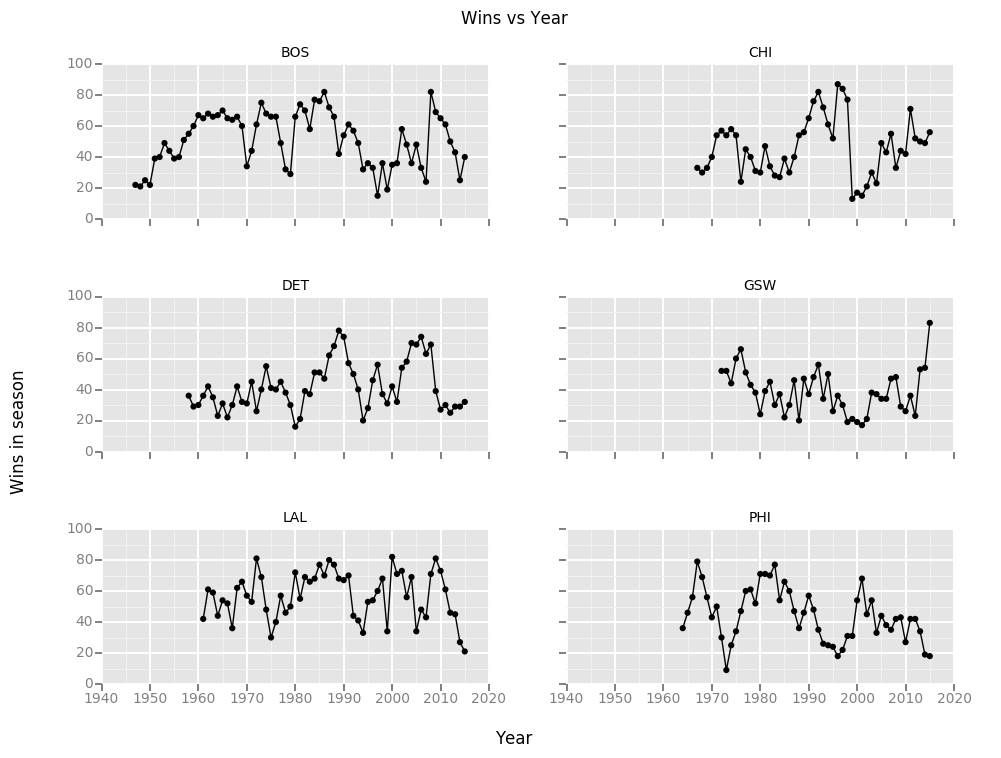

<ggplot: (8750777345747)>

In [181]:
ts_graph = ggplot(aes(x='year_id',y='game_result'),data = ts)
ts_graph + facet_wrap("team_id") + geom_line() + geom_point() + xlab("Year") + ylab("Wins in season") + \
           ggtitle("Wins vs Year")

---
# Is there a particular time when teams play best?

In [326]:
t = nba
t['date'] = pd.to_datetime(t['date_game']) #Make a new column, date, that has date_game as a date object
t['month'],t['day'] = t['date'].dt.month, t['date'].dt.day #Create 2 new columns for month and day
t['monthDay'] = t['month'].map(str) + '/' + t['day'].map(str) #Puts 2 month and day columns together

In [335]:
dates = t[t._iscopy == 0]
dates = dates[['monthDay','pts','opp_pts']]
dates = dates.groupby(['monthDay']).mean()
dates = dates.reset_index()
dates.head()

monthDay         pts     opp_pts
0      1/1  100.096386   96.108434
1     1/10  104.350975   99.924791
2     1/11  104.559055  100.448819
3     1/12  105.783133  101.858434
4     1/13  105.417867  100.850144

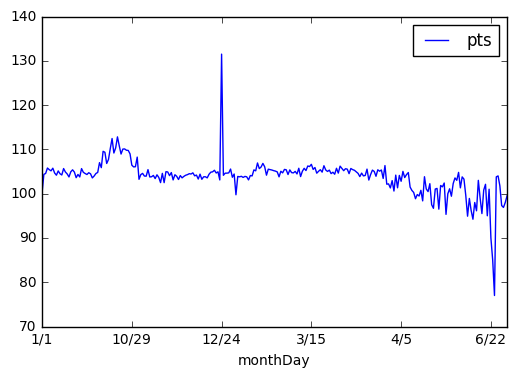

In [341]:
dates.plot(kind='line',x='monthDay',y='pts')